# Constraint Satisfaction Problems

## Introduction
Suppose a Sudoku game filled initially with some numbers in some squares, and you want to fill the empty squares with numbers in the range from 1 to 9 which there is no row, column or block has a number repeating itself. This is a simple way to understand the constraint satisfaction problems, as you are supposed to solve a problem with some constraints, then the remaining empty squares which have to be filled called "variables", and the range of numbers (1-9) called a "domain", simply the variables take on values from the domain, the conditions governing how a variable will choose its domain are called "constraints".

A constraint satisfaction problem (CSP) is a problem that has to be solved within some constraints or conditions. It consists of the following:

- A finite set of variables that store the solution (V = {V1, V2, V3,....., Vn})
- A set of values known as the domain from which the solution is picked (D = {D1, D2, D3,.....,Dn})
- A finite set of constraints (C = {C1, C2, C3,......, Cn})

##### Here are some of the popular problems that can be solved using CSP:

- n-Queen (In an n-queen problem, n queens should be placed in an nXn matrix such that no queen shares the same row, column or diagonal.)
- Map Coloring (colouring different regions of map, ensuring no adjacent regions have the same colour)
- Crossword (everyday puzzles appearing in newspapers)
- Sudoku (a number grid)
- Latin Square Problem

##### To convert the problem to CSP take the following steps:

- Create a variable set.
- Create a domain set.
- Create a constraint set with variables and domains 
- Find an optimal solution.



## N-Queens Problem
N-Queens problem is to place or locate (n) numbers of queens (queen in chessboard) in such a manner on an n x n chessboard that no queen can attack any another queen through being in the same row, column or diagonal.

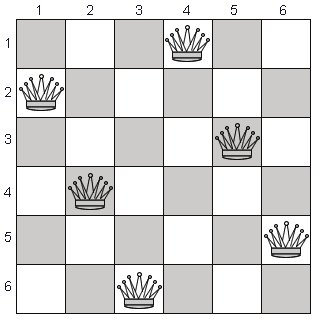


We can represent the board as a matrix as follows

In [1]:
chessboardEmpty = [[0, 0, 0, 0], [0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]

In [2]:
print(chessboardEmpty)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [3]:
chessboardSolved = [[0, 0, 1, 0], [1, 0, 0, 0],[0, 0, 0, 1],[0, 1, 0, 0]]

In [4]:
print(chessboardSolved)

[[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0]]


## Arc Consistancy AC-3
AC-3 algorithm is used as a preprocess step, where AC-3 detects conflicts that you will have in attributions, during the implementation, and deletes them.
By cutting the domains of the variables in the CSP. So when two variables share a restriction we say that there's an arc between both. You say that the arc between A and B is consistent if:
- A->B is consistent: foreach value a that A can take there's a value b that B can take respecting the restriction.
- B->A is consistent: foreach value b that B can take there's a value a that A can take respecting the restriction.

## Backtracking with AC-3
The main concept of Backtrack algorithm is to solving problems recursively by trying to build a solution incrementally, one piece at a time

#### Implementation
to implement the algorithm, we will do the following procedures: 
1. Start in at the first left column
2. If all queens are placed return true
3. Try all rows in the current column. 
   Do the following procedures for every tried row.
    a. If the queen can be placed safely in this row then mark this [row, column] as part of the solution and recursively check if placing queen here leads to a solution.
    b. If placing the queen in [row, column] leads to a solution then return true.
    c. If placing queen doesn't lead to a solution then unmark this [row, column] (Backtrack) and go to step (a) to try other rows.
3. If all rows have been tried and nothing worked, return false to trigger backtracking.

#### Applying the algorithm on the problem

In [5]:
# The number of N which could be 4,8,16,....
# Queen_Number = 4

In [6]:
def isAvliable(chessboard, row, col, Queen_Number):
  
    # Check the row on right side
    for x in range(col):
        if chessboard[row][x] == 'X':
            return False
  
    # Check upper diagonal on left side
    for x, y in zip(range(row, -1, -1), 
                    range(col, -1, -1)):
        if chessboard[x][y] == 'X':
            return False
  
    # Check lower diagonal on right side
    for x, y in zip(range(row, Queen_Number, 1), 
                    range(col, -1, -1)):
        if chessboard[x][y] == 'X':
            return False
  
    return True

In [7]:
# Simple Bactrack function to solve N-Queen
def FindSolution(chessboard, col, Queen_Number):
      
    # If all queens are placed then return true
    if col >= Queen_Number:
        return True
  
    # Else it will begin placing this queen in all rows one by one
    for x in range(Queen_Number):
  
        if isAvliable(chessboard, x, col , Queen_Number):
              
            # Place this queen in chessboard[x][col]
            chessboard[x][col] = 'X'
  
            # recur to place rest of the queens
            if FindSolution(chessboard, col + 1, Queen_Number) == True:
                return True
  
            # If placing queen in chessboard[x][col
            # doesn't lead to a solution, then
            # queen from chessboard[x][col]
            chessboard[x][col] = 0
  
    # if the queen can not be placed in any row in
    # this colum col then return false
    return False

###### The following function is to print if no solution found 

In [8]:
def findSolution_N_Queen(chessboard1,Queen_Number):
    if FindSolution(chessboard1, 0 , Queen_Number) == False:
        print ("Solution does not exist")
        return False
  
    print(chessboard1)
    return True

#### Output

In [9]:
Queen_Number = 4
chessboard = [ [0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0] ]
findSolution_N_Queen(chessboard, Queen_Number)

[[0, 0, 'X', 0], ['X', 0, 0, 0], [0, 0, 0, 'X'], [0, 'X', 0, 0]]


True

#### Testing the algorithm on several sample
now lets try to solve 8-queens problem!

In [10]:
Queen_Number = 8
chessboard = [[0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0]]
findSolution_N_Queen(chessboard, Queen_Number)

[['X', 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 'X', 0], [0, 0, 0, 0, 'X', 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 'X'], [0, 'X', 0, 0, 0, 0, 0, 0], [0, 0, 0, 'X', 0, 0, 0, 0], [0, 0, 0, 0, 0, 'X', 0, 0], [0, 0, 'X', 0, 0, 0, 0, 0]]


True

Now lets try to solve 16-queens problem!

In [11]:
Queen_Number = 16
chessboard = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
findSolution_N_Queen(chessboard, Queen_Number)

[['X', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 'X', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 'X', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'X', 0, 0, 0], [0, 0, 'X', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 'X', 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'X', 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'X', 0], [0, 0, 0, 0, 0, 'X', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'X'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'X', 0, 0], [0, 0, 0, 0, 0, 0, 0, 'X', 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 'X', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 'X', 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 'X', 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'X', 0, 0, 0, 0, 0]]


True

# Comparison of algorithm’s performance

For N number of queens, the complexity equals n when using AC-3 because there is no recursion, while backtracking using recursion style then the number of checking inside the loop equals n^2.
		
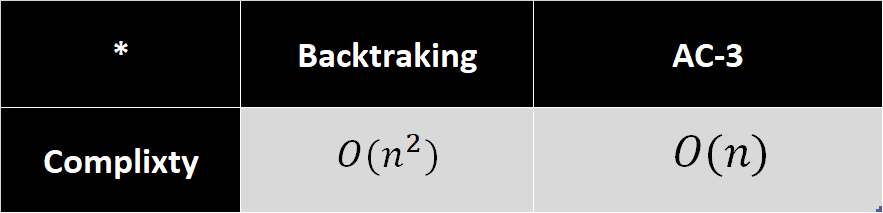

## References and resources

1. https://study.com/academy/lesson/constraint-satisfaction-problems-definition-examples.html
2. https://en.wikipedia.org/wiki/Constraint_satisfaction_problem#:~:text=Constraint%20satisfaction%20problems%20(CSPs)%20are,number%20of%20constraints%20or%20limitations.&text=CSPs%20often%20exhibit%20high%20complexity,solved%20in%20a%20reasonable%20time.
3. https://www.youtube.com/watch?v=lCrHYT_EhDs
4. https://www.geeksforgeeks.org/n-queen-problem-backtracking-3/
5. https://en.wikipedia.org/wiki/AC-3_algorithm
6. https://www.sciencedirect.com/topics/computer-science/arc-consistency
7. https://www.sciencedirect.com/topics/computer-science/arc-consistency-algorithm
8. https://link.springer.com/article/10.1023/A:1011096320004
9. https://github.com/BartekH/CSP
10. https://www.youtube.com/watch?v=-47nFq_9_zk
11. https://www.researchgate.net/figure/A-solution-of-the-6-queens-problem-As-an-example-let-us-consider-the-6-queens-problem_fig1_221787117